## Importing Libraries

In [1]:
from importlib import reload
import pandas as pd
import model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor
)
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
reload(ms)

<module 'model_selection' from 'e:\\Ames-Housing-Price-Predictor\\notebooks\\model_selection.py'>

## Load dataset

In [2]:
df = pd.read_parquet('../data/processed/06_feature_selection.parquet')

In [6]:
target = 'saleprice'
x = df.drop(columns=[target])
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.1,
    random_state=17,
)

## Model Training

In [7]:
models = {
    'Bagging Regressor': BaggingRegressor(),
    'Random Forest': RandomForestRegressor(n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(verbose=0),
    'CatBoost': CatBoostRegressor(task_type='GPU', devices='0', verbose=0),
    'LightGBM': LGBMRegressor(device='gpu', n_jobs=-1, verbose=-1),
    "XGBoost": XGBRegressor(tree_method="hist", device="cuda")
}

In [8]:
reload(ms)
regression_metrics, predictions_dict, importances_dict = ms.model_predict(models, x_train, x_test, y_train, y_test)


✅ Testing Bagging Regressor...
MAE: 16814.77337883959 | MSE: 635064799.001843 | RMSE: 25200.492038883745 | R²: 0.9084368710242302 | RMSLE: 0.13556292099245174 | MAPE: 0.09867411801955847
--------------------------------------------------

✅ Testing Random Forest...
MAE: 16545.820443686007 | MSE: 578250158.8259628 | RMSE: 24046.832615252322 | R²: 0.9166283598838119 | RMSLE: 0.13329875453100382 | MAPE: 0.09757195467587665
--------------------------------------------------

✅ Testing Gradient Boosting...
MAE: 15499.115057752375 | MSE: 513166967.4193217 | RMSE: 22653.18890177102 | R²: 0.9260120017708875 | RMSLE: 0.12241236366162879 | MAPE: 0.08887444158751008
--------------------------------------------------

✅ Testing CatBoost...
MAE: 14527.349201279747 | MSE: 453453885.31022424 | RMSE: 21294.456680324678 | R²: 0.9346213856436664 | RMSLE: 0.11583120926230261 | MAPE: 0.08484584141943209
--------------------------------------------------

✅ Testing LightGBM...
MAE: 15549.252066899333 | MS

## Model Evaluation

### Regression Metrics

In [110]:
regression_metrics

,Model,MAE,MSE,RMSE,R²,RMSLE,MAPE
0,Bagging Regressor,16806.562969,6.055072e+08,24607.055661,0.908414,0.151965,0.106601
1,Random Forest,15645.742491,5.108524e+08,22602.044093,0.922731,0.140854,0.098475
2,Gradient Boosting,14527.232074,4.489355e+08,21188.098409,0.932096,0.131117,0.089959
3,CatBoost,14277.441050,4.663744e+08,21595.704121,0.929458,0.126970,0.086864
4,LightGBM,13795.755981,4.686545e+08,21648.428450,0.929114,0.127568,0.083772
5,XGBoost,15545.885132,5.603903e+08,23672.563822,0.915238,0.135555,0.093631


### Feature Importances

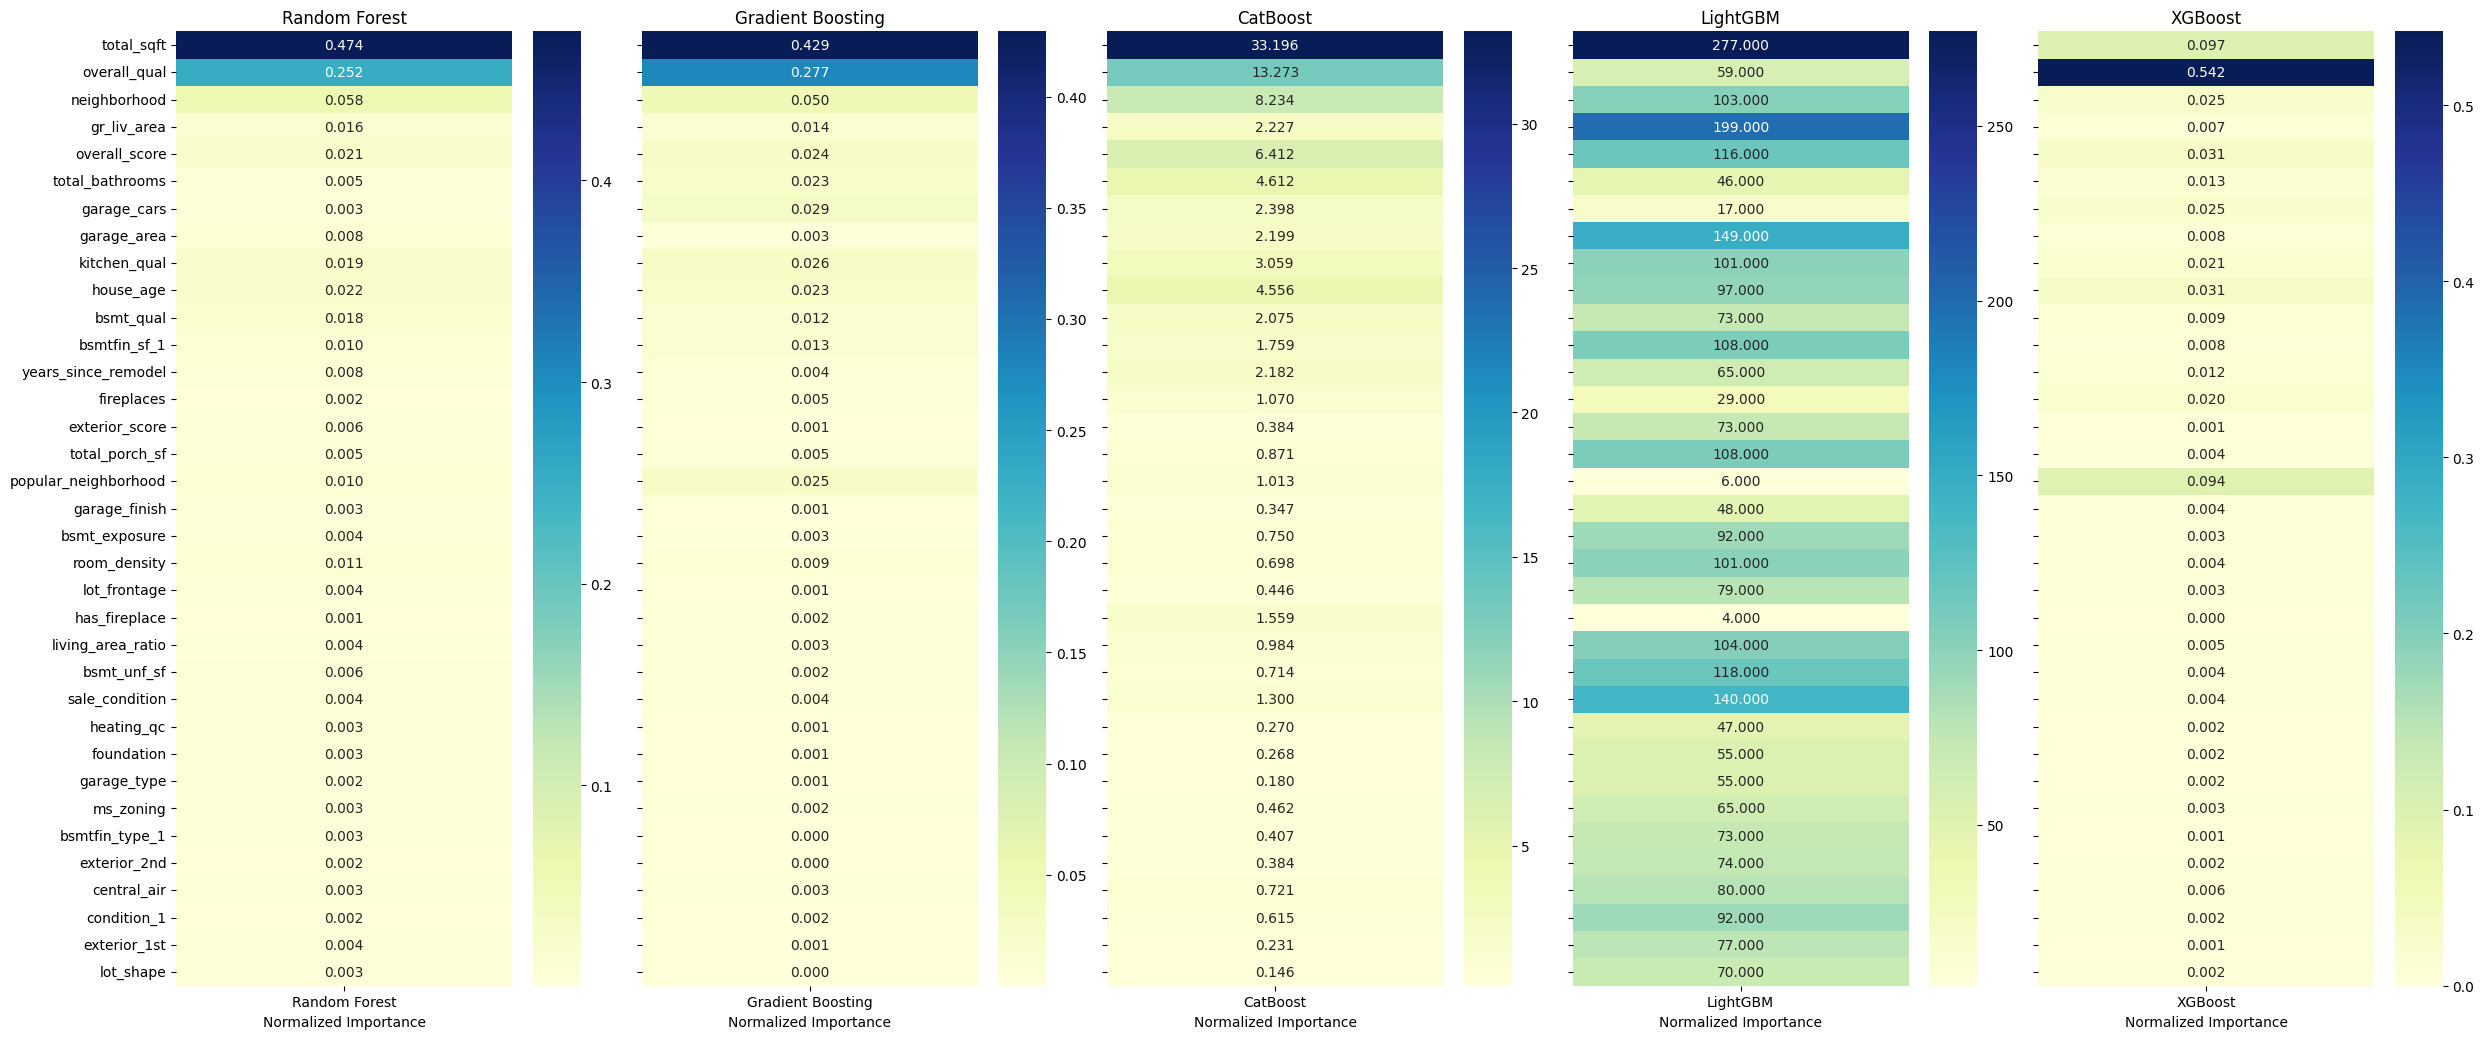

In [111]:
ms.plot_feature_importances(df.drop(columns=target).columns, importances_dict)

### Residuals Plot

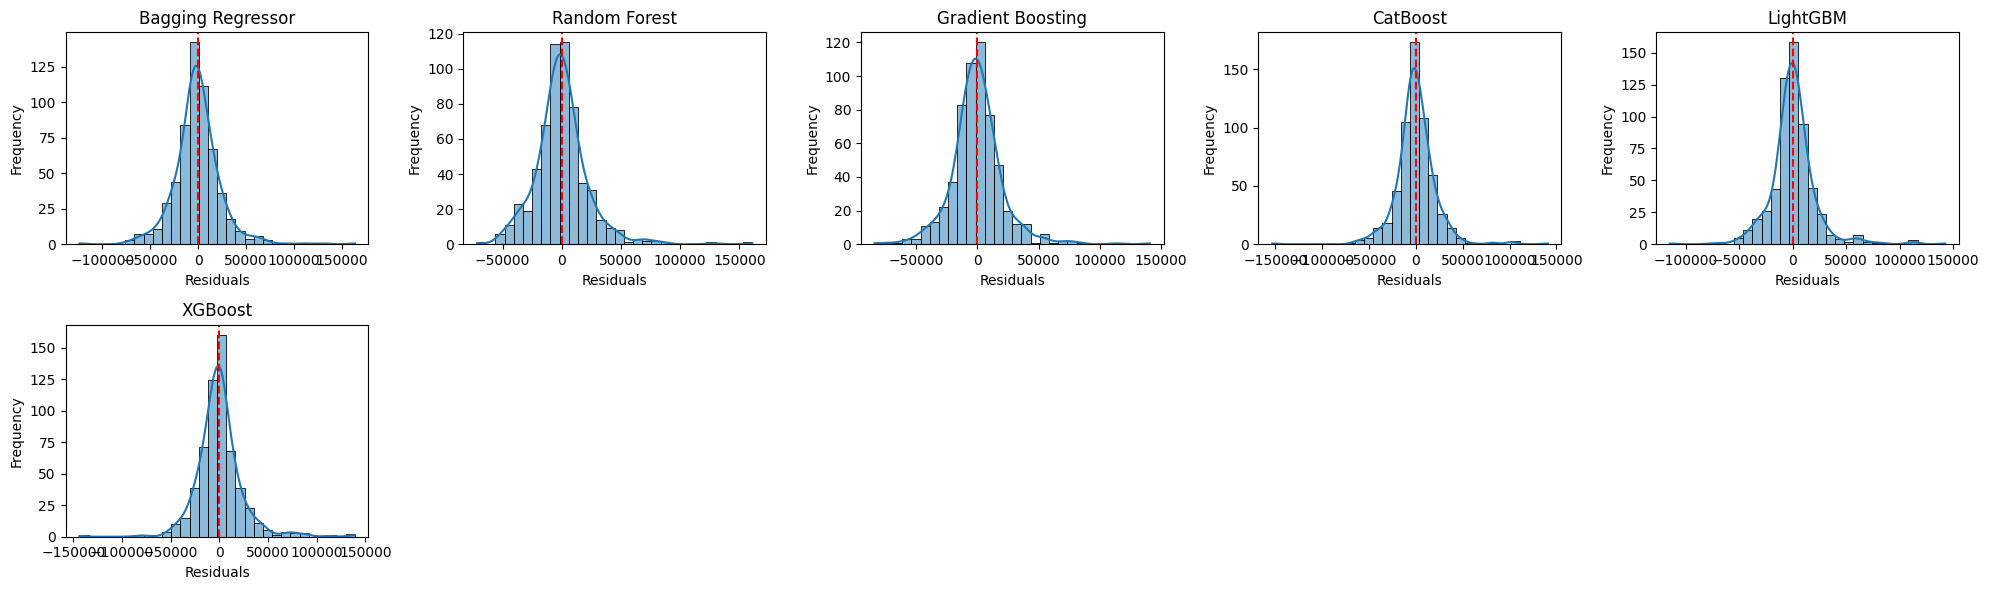

In [112]:
reload(ms)
ms.plot_residuals(y_test, predictions_dict, n_cols=5)

### Scatter Plot

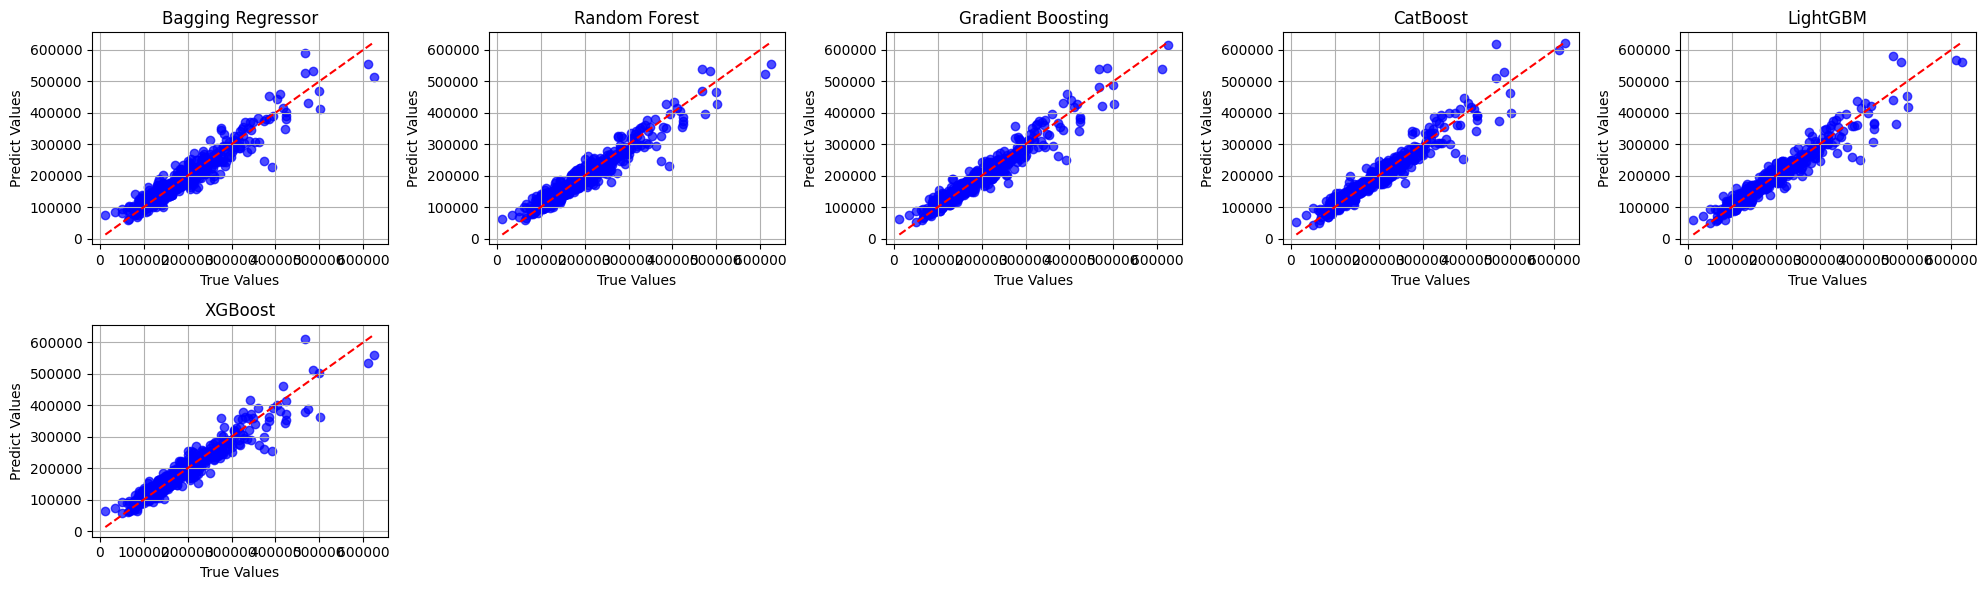

In [113]:
reload(ms)
ms.scatter_plot(y_test, predictions_dict, n_cols=5)

### Learning Curve

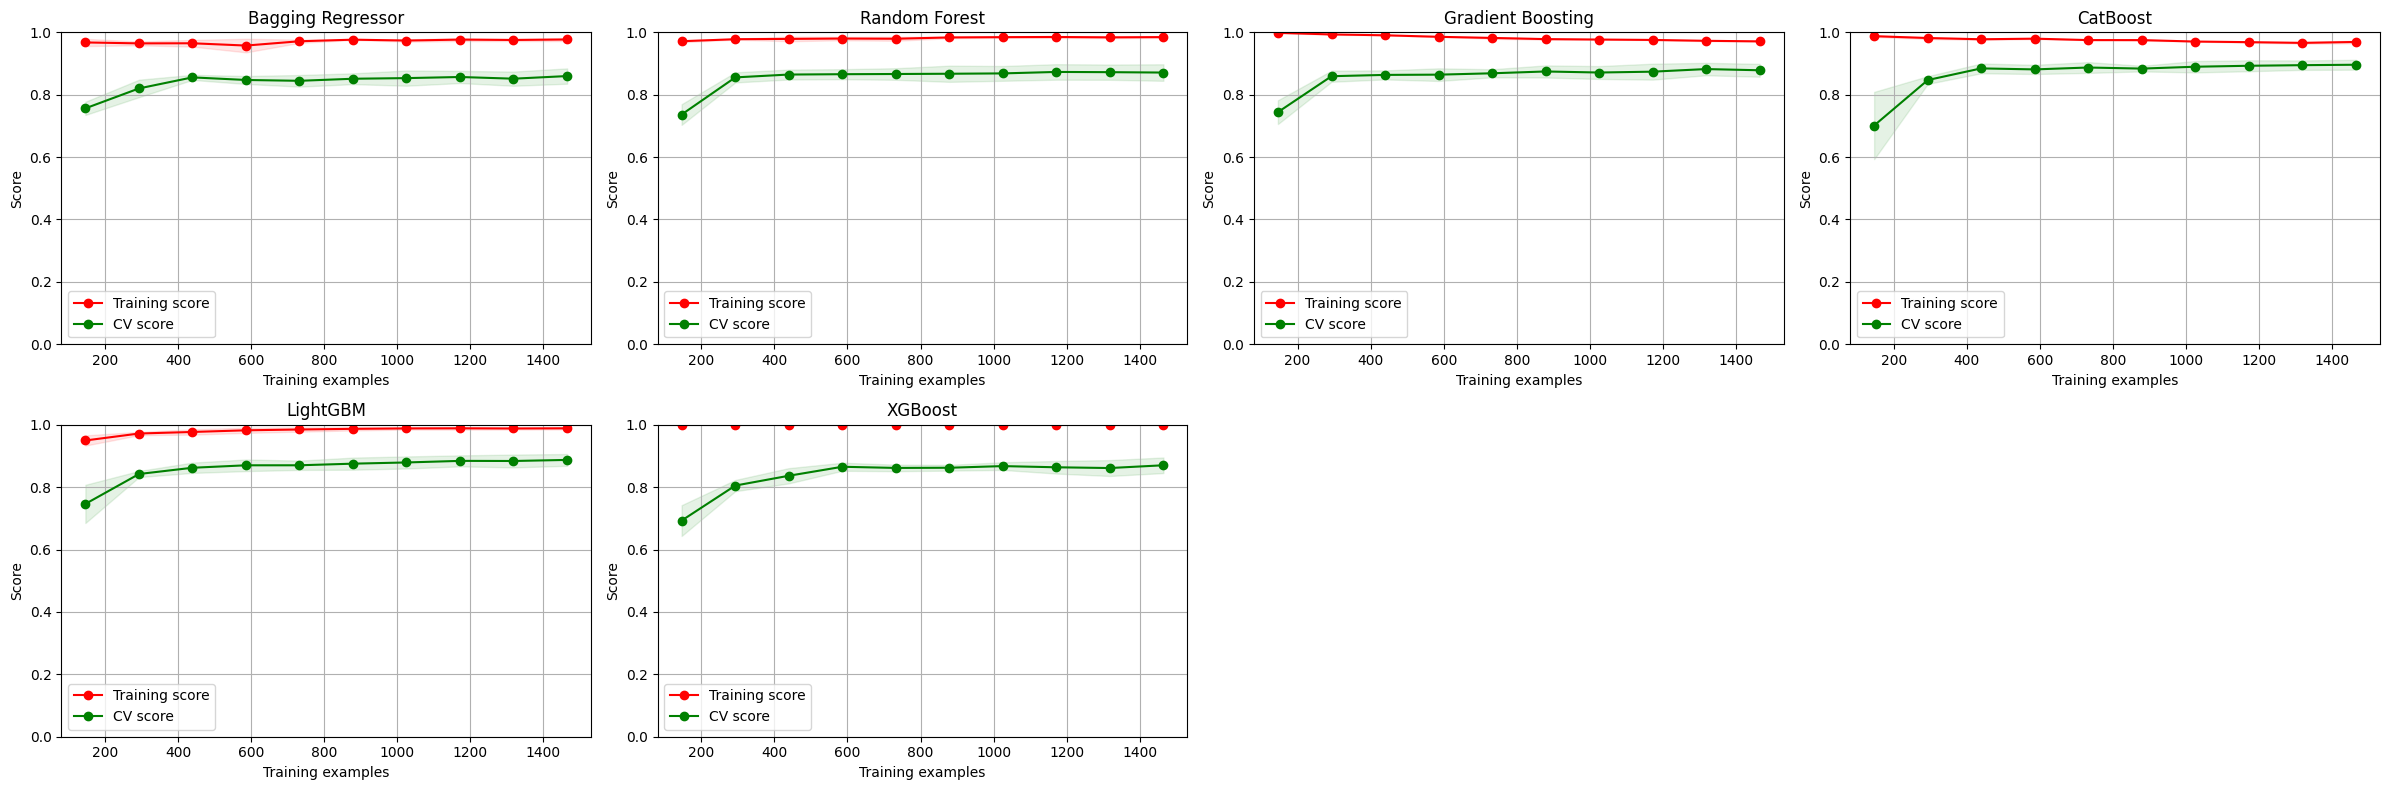

In [114]:
reload(ms)
learning_curve_summary = ms.learning_curves_regression(models, x, y, cv=2, scoring='r2', cols=4)

### Learning Curve Summary

In [116]:
learning_curve_summary

,Model,Train score,CV score,Gap,Best n_samples
0,Bagging Regressor,0.977062,0.859799,0.117263,1465
1,Random Forest,0.984739,0.871041,0.113698,1172
2,Gradient Boosting,0.971054,0.878356,0.092698,1318
3,CatBoost,0.969193,0.896079,0.073114,1465
4,LightGBM,0.988860,0.887537,0.101324,1465
5,XGBoost,0.999903,0.870340,0.129563,1465


### Best Model

In [ ]:
models['CatBoost'].save_model("../models/catboost_model.cbm")

In [117]:
regression_metrics

,Model,MAE,MSE,RMSE,R²,RMSLE,MAPE
0,Bagging Regressor,16806.562969,6.055072e+08,24607.055661,0.908414,0.151965,0.106601
1,Random Forest,15645.742491,5.108524e+08,22602.044093,0.922731,0.140854,0.098475
2,Gradient Boosting,14527.232074,4.489355e+08,21188.098409,0.932096,0.131117,0.089959
3,CatBoost,14277.441050,4.663744e+08,21595.704121,0.929458,0.126970,0.086864
4,LightGBM,13795.755981,4.686545e+08,21648.428450,0.929114,0.127568,0.083772
5,XGBoost,15545.885132,5.603903e+08,23672.563822,0.915238,0.135555,0.093631
